<a href="https://colab.research.google.com/github/String137/Keras_practice/blob/master/Keras%205.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!wget https://github.com/String137/Keras_practice/archive/master.zip
!unzip master.zip
!mv Keras_practice-master/datasets ./

--2019-02-11 11:50:28--  https://github.com/String137/Keras_practice/archive/master.zip
Resolving github.com (github.com)... 192.30.253.112, 192.30.253.113
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/String137/Keras_practice/zip/master [following]
--2019-02-11 11:50:33--  https://codeload.github.com/String137/Keras_practice/zip/master
Resolving codeload.github.com (codeload.github.com)... 192.30.253.120, 192.30.253.121
Connecting to codeload.github.com (codeload.github.com)|192.30.253.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [       <=>          ] 633.35M  33.4MB/s    in 19s     

2019-02-11 11:50:52 (33.6 MB/s) - ‘master.zip’ saved [664114378]

Archive:  master.zip
edae57546ca93218a5f65310f04e7e32763004ad
   creating: Keras_practice-master/
   creating: Ker

In [5]:
import os, shutil

print(os.getcwd())
original_dataset_dir = './datasets/cats_and_dogs/train'

base_dir = './datasets/cats_and_dogs_small'
if not os.path.exists(base_dir):
    os.mkdir(base_dir)

/content


In [0]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

if not os.path.exists(train_dir):
    os.mkdir(train_dir)
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)    
if not os.path.exists(test_dir):
    os.mkdir(test_dir)
if not os.path.exists(train_cats_dir):
    os.mkdir(train_cats_dir)
if not os.path.exists(train_dogs_dir):
    os.mkdir(train_dogs_dir)
if not os.path.exists(validation_cats_dir):
    os.mkdir(validation_cats_dir)
if not os.path.exists(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)
if not os.path.exists(test_cats_dir):
    os.mkdir(test_cats_dir)
if not os.path.exists(test_dogs_dir):
    os.mkdir(test_dogs_dir)

In [0]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    if not os.path.exists(dst):
        shutil.copyfile(src, dst)
        
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    if not os.path.exists(dst):
        shutil.copyfile(src, dst)
        
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    if not os.path.exists(dst):
        shutil.copyfile(src, dst)
        

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    if not os.path.exists(dst):
        shutil.copyfile(src, dst)
        
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    if not os.path.exists(dst):
        shutil.copyfile(src, dst)
        
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    if not os.path.exists(dst):
        shutil.copyfile(src, dst)

In [8]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [0]:
from keras import optimizers

model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr = 1e-4), metrics = ['acc'])

In [11]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size = (150, 150), batch_size = 20, class_mode = 'binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size = (150, 150), batch_size = 20, class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
#history = model.fit_generator(train_generator, steps_per_epoch = 100, epochs = 30, validation_data = validation_generator, validation_steps = 50)

In [0]:
#model.save('cats_and_dogs_small_2.h5')

In [0]:
datagen = ImageDataGenerator(rotation_range = 20,
                             width_shift_range = 0.1,
                             height_shift_range = 0.1,
                             shear_range = 0.1,
                             zoom_range = 0.1,
                             horizontal_flip = True,
                             fill_mode = 'nearest')

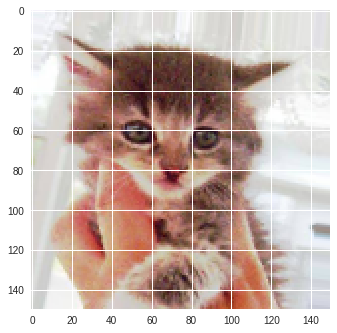

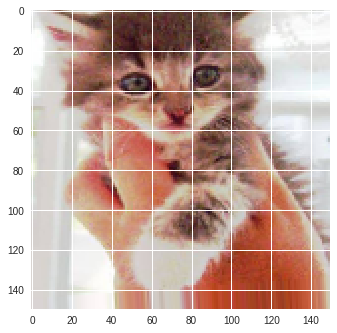

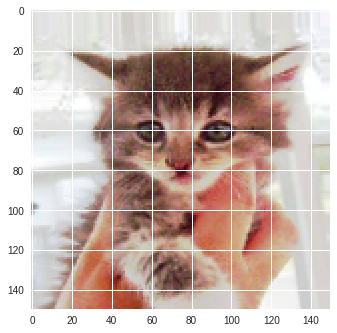

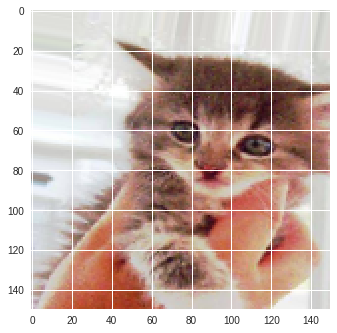

In [15]:
import matplotlib.pyplot as plt
from keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

img_path = fnames[3]

img = image.load_img(img_path, target_size = (150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size = 1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

        
plt.show()

In [16]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr = 1e-4), metrics = ['acc'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [17]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150, 150),
                                                    batch_size = 32,
                                                    class_mode = 'binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                    target_size = (150, 150),
                                                    batch_size = 32,
                                                    class_mode = 'binary')

history = model.fit_generator(train_generator,
                              steps_per_epoch = 100,
                              epochs = 100,
                              validation_data = validation_generator,
                              validation_steps = 50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
100/100 [==============================] - 37s 374ms/step - loss: 0.6931 - acc: 0.5109 - val_loss: 0.6894 - val_acc: 0.5082
Epoch 2/100
100/100 [==============================] - 33s 325ms/step - loss: 0.6844 - acc: 0.5513 - val_loss: 0.6615 - val_acc: 0.6089
Epoch 3/100
100/100 [==============================] - 33s 327ms/step - loss: 0.6725 - acc: 0.5794 - val_loss: 0.6488 - val_acc: 0.6098
Epoch 4/100
100/100 [==============================] - 32s 317ms/step - loss: 0.6564 - acc: 0.5950 - val_loss: 0.6770 - val_acc: 0.5670
Epoch 5/100
100/100 [==============================] - 34s 344ms/step - loss: 0.6452 - acc: 0.6225 - val_loss: 0.6193 - val_acc: 0.6434
Epoch 6/100
100/100 [==============================] - 32s 323ms/step - loss: 0.6268 - acc: 0.6413 - val_loss: 0.6376 - val_acc: 0.6192
Epoch 7/100
100/100 [==============================]

In [0]:
model.save('cats_and_dogs_small_2.h5')

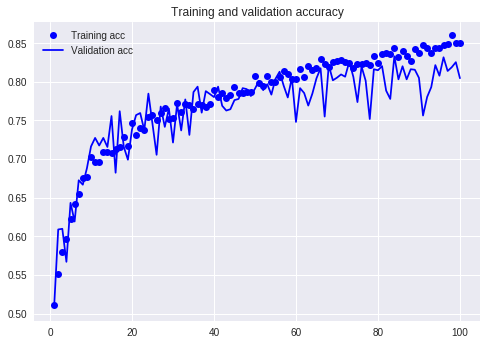

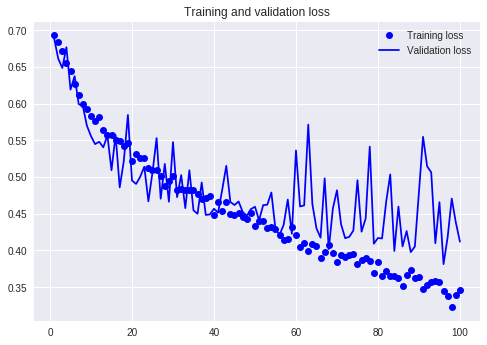

In [20]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()